<a href="https://colab.research.google.com/github/paascorb/AgendaAndroidStudio/blob/master/practica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 8. Visión por computador II

En esta práctica vamos a crear un clasificador capaz de reconocer dígitos manuscritos, para ello utilizaremos el dataset [MNIST](http://yann.lecun.com/exdb/mnist/) que ya hemos utilizado en prácticas anteriores. La parte obligatoria de la práctica se evalúa sobre 6 puntos; además, esta práctica contiene tres ejercicios adicionales incluidos al final de este fichero, y un ejercicio adicional en el notebook adicional. 

Recordad los 5 pasos de un clasificador de imágenes:
1. Preparar el dataset.
2. Separar en conjuntos de entrenamiento, test y validación.
3. Extraer descriptores.
4. Entrenar el modelo.
5. Evaluar el modelo.

En muchas ocasiones los pasos 2 y 3 son intercambiables, y es lo que haremos en esta práctica.

## 0. Carga del dataset y descripción de las imágenes
 
Para cargar el dataset y describir las imágenes vamos a utilizar las clases `CargaYDescribe` (definida en el fichero CargaYDescribe.py de la carpeta p10) y la clase `Descriptor` junto con sus hijas (definidas en el fichero Descriptor.py también dentro de la carpeta p10). Deberás descargar esta carpeta y descomprimirla utilizando el siguiente comando. 



In [1]:
!wget www.unirioja.es/cu/joheras/ia/p10/p10.zip -O p08.zip
!unzip p08.zip

--2021-05-01 23:28:57--  http://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.unirioja.es/cu/joheras/ia/p10/p10.zip [following]
--2021-05-01 23:28:58--  https://www.unirioja.es/cu/joheras/ia/p10/p10.zip
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1274 (1.2K) [application/zip]
Saving to: ‘p08.zip’

p08.zip             100%[===================>]   1.24K  --.-KB/s    in 0s      

2021-05-01 23:28:59 (56.9 MB/s) - ‘p08.zip’ saved [1274/1274]

Archive:  p08.zip
   creating: p10/
  inflating: p10/CargaYDescribe.py   
  inflating: p10/Descriptor.py       
  inflating: p10/__init__.py         


Si abres el fichero Descriptor.py (puedes abrir dicho fichero pulsando en la pestaña con el símbolo ">" que aparece a la izquierda de la pantalla y luego pulsando en la pestaña Files), verás la definición de la clase `Descriptor` y de dos clases hijas. La principal característica de la clase `Descriptor` es que tiene un método llamado `describe` que sirve para describir una imagen. Este método es abstracto y lo proporcionan las clases hijas.

##### Pregunta

¿Qué hacen los métodos ``describe`` de las clases RawImage y Projection?

RawImage transforma si está a color a escala de grises y saca un descriptor por cada posición de los pixeles.
Projection es similar pero hace la suma por filas y por columnas de los valores de los pixeles, es decir saca la proyección de la imagen.

Si ahora abres el fichero CargaYDescribe.py verás la definición de la clase `CargaYDescribe`. Esta clase permite cargar y describir las imágenes de un directorio que está organizado mediante carpetas donde cada carpeta contiene
las imágenes de una clase.

El constructor de esta clase recibe dos parámetros, un objeto de la clase `Descriptor`, lo que nos permite cambiar fácilmente el método que usamos para describir las imágenes (esta es una técnica llamada inyección de dependencias que ya hemos utilizado alguna vez), y un path que es donde se encuentran las carpetas con las imágenes de cada clase.

Definimos una variable donde almacenamos el path donde se encuentran nuestra imágenes. De nuevo, es necesario descargar la carpeta.

In [2]:
!wget www.unirioja.es/cu/joheras/ia/p10/digitos.zip
!unzip digitos.zip

URL transformed to HTTPS due to an HSTS policy
--2021-05-01 23:36:17--  https://www.unirioja.es/cu/joheras/ia/p10/digitos.zip
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176634 (2.1M) [application/zip]
Saving to: ‘digitos.zip’

digitos.zip         100%[===================>]   2.08M  1.06MB/s    in 2.0s    

2021-05-01 23:36:21 (1.06 MB/s) - ‘digitos.zip’ saved [2176634/2176634]

Archive:  digitos.zip
   creating: digitos/
   creating: digitos/0/
  inflating: digitos/0/0.jpg         
  inflating: digitos/0/1.jpg         
  inflating: digitos/0/10.jpg        
  inflating: digitos/0/100.jpg       
  inflating: digitos/0/101.jpg       
  inflating: digitos/0/102.jpg       
  inflating: digitos/0/103.jpg       
  inflating: digitos/0/104.jpg       
  inflating: digitos/0/105.jpg       
  inflating: digitos/0/106.jpg       
  inflating: digit

In [3]:
dataset = "digitos/"

Para este ejemplo vamos a utilizar como descriptor el RawImage. 

In [4]:
from p10.Descriptor import *
from p10.CargaYDescribe import *

descriptor = RawImage()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

##### Ejercicio

Comprueba que puedes cambiar de descriptor y que todo sigue funcionando correctamente.


In [5]:
descriptor = Projection()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

Volvemos a RawImage

In [17]:
descriptor = RawImage()
cargaDatos = CargaYDescribe(dataset,descriptor)
(datos,etiquetas) = cargaDatos.cargaYdescribe()

## 1. Separando el conjunto de entrenamiento y el de test

##### Ejercicio

Utiliza la función train_test_split, vista en las prácticas de aprendizaje automático, para partir el dataset en la siguiente proporción: 75% entrenamiento, 25% test. Almacena la partición en las variables:
`trainData`, `testData`, `trainLabels`, `testLabels`. Utiliza como random_state el valor 84 para así obtener siempre los mismos resultados.

In [153]:
from sklearn.model_selection import train_test_split
(trainData, testData, trainLabels, testLabels) = train_test_split(datos,etiquetas,test_size=0.25, random_state=42)

## 2. Entrenando el modelo

Una vez que hemos partido el banco de imágenes, podemos entrenar distintos modelos como vimos en prácticas anteriores. 

**Ejercicio** 

Utiliza KNN y aplica validación cruzada para fijar los hiperparámetros.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,5):
  score = cross_val_score(KNeighborsClassifier(n_neighbors=i), trainData, trainLabels, cv=5, scoring='accuracy')
  print(score)

[0.890625   0.91145833 0.9140625  0.91927083 0.89322917]
[0.859375   0.88020833 0.88802083 0.89322917 0.859375  ]
[0.8828125  0.90625    0.89583333 0.90885417 0.875     ]
[0.88541667 0.90885417 0.89583333 0.8984375  0.8828125 ]


**Ejercicio** 

Una vez hayas encontrado los mejores hiperparámetros almacena y entrena el modelo.

In [16]:
modelKNN = KNeighborsClassifier(n_neighbors=3)

##### Ejercicio

Utiliza otro de los algoritmos de clasificación vistos en las prácticas anteriores para crear un nuevo modelo.

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
for i in range(2,10):
  score = cross_val_score(ExtraTreesClassifier(min_samples_split=i), trainData, trainLabels, cv=5, scoring='accuracy')
  print(score)

[0.9140625  0.8984375  0.92447917 0.90364583 0.90885417]
[0.89322917 0.90885417 0.921875   0.91927083 0.91145833]
[0.90104167 0.91666667 0.93229167 0.91666667 0.92708333]
[0.90104167 0.91666667 0.921875   0.91927083 0.91666667]
[0.91666667 0.9140625  0.91145833 0.90885417 0.92447917]
[0.90885417 0.90625    0.9140625  0.90625    0.92708333]
[0.90364583 0.9140625  0.91927083 0.91666667 0.91927083]
[0.90625    0.92708333 0.91927083 0.90625    0.92708333]


## 3. Evaluando el modelo

##### Ejercicio
Una vez tienes tu modelo construido evalualo utilizando la función `classification_report` de la librería sklearn.

Creamos el modelo:

In [51]:
modelKNN  = KNeighborsClassifier(n_neighbors=4).fit(trainData,trainLabels);
pred = modelo.predict(testData)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(testLabels, pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.81      1.00      0.89        55
           2       0.96      0.85      0.90        60
           3       0.92      0.85      0.88        72
           4       0.96      0.92      0.94        76
           5       0.84      0.86      0.85        59
           6       0.97      0.98      0.98        62
           7       0.92      0.92      0.92        60
           8       0.95      0.79      0.86        71
           9       0.77      0.85      0.81        62

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



##### Ejercicio 

A continuación muestra la matriz de confusión para ver dónde se producen los fallos. 

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testLabels, pred)

array([[61,  0,  0,  1,  0,  0,  1,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  2, 52,  0,  0,  0,  0,  3,  0,  1],
       [ 0,  3,  0, 62,  0,  2,  0,  1,  1,  3],
       [ 0,  1,  0,  0, 66,  0,  0,  0,  1,  8],
       [ 1,  1,  0,  0,  1, 52,  1,  0,  1,  2],
       [ 1,  0,  0,  0,  0,  0, 61,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0, 56,  0,  2],
       [ 1,  4,  0,  2,  1,  7,  0,  0, 53,  3],
       [ 1,  0,  0,  3,  0,  1,  0,  1,  0, 56]])

##### Ejercicio

Con el modelo KNN somos capaces de conseguir una precisión del 92%, aunque no está mal, se puede mejorar. Intenta construir un modelo que mejore estos resultados, puedes probar también a cambiar de descriptor.

In [35]:
from sklearn.svm import SVC
modeloMejor  = SVC().fit(trainData,trainLabels);
predMejor = modeloMejor.predict(testData)
print(classification_report(testLabels, predMejor))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.93      1.00      0.96        55
           2       0.97      0.93      0.95        60
           3       0.91      0.82      0.86        72
           4       0.94      0.96      0.95        76
           5       0.85      0.90      0.88        59
           6       0.95      1.00      0.98        62
           7       0.98      0.92      0.95        60
           8       0.91      0.89      0.90        71
           9       0.88      0.90      0.89        62

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



Parece que con SVC conseguimos mejores resultados, probablemente esto se pueda mejorara, pero por ahora con 93% nos conformamos.

## 4. Guardando y cargando el modelo

El proceso de entrenar un modelo puede ser muy costoso, por lo que conviene guardar el modelo para poder recuperarlo posteriormente. Para ello utilizamos la librería `pickle`.

In [47]:
import pickle

La siguiente instrucción guarda el modelo en el fichero modelo.sav.

In [53]:
pickle.dump(modelKNN, open('modelo.sav', 'wb'))

La siguiente instrucción carga el modelo del fichero modelo.sav.

In [54]:
loaded_model = pickle.load(open('modelo.sav', 'rb'))

Ahora podemos usar el modelo igual que antes.

In [55]:
predictions = loaded_model.predict(testData)
print(classification_report(testLabels, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        63
           1       0.81      1.00      0.89        55
           2       0.96      0.85      0.90        60
           3       0.92      0.85      0.88        72
           4       0.96      0.92      0.94        76
           5       0.84      0.86      0.85        59
           6       0.97      0.98      0.98        62
           7       0.92      0.92      0.92        60
           8       0.95      0.79      0.86        71
           9       0.77      0.85      0.81        62

    accuracy                           0.90       640
   macro avg       0.90      0.90      0.90       640
weighted avg       0.90      0.90      0.90       640



Para descargar el fichero desde Colab a nuestro ordenador, hay que ejecutar las siguientes instrucciones (esta funcionalidad solo está disponible usando como navegador Google Chrome).

In [56]:
from google.colab import files
files.download('modelo.sav') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Ejercicio

Guarda tu mejor modelo en el fichero `mimodelo.sav`.

In [57]:
pickle.dump(modeloMejor, open('mimodelo.sav', 'wb'))

###### Ejercicio

Realizar un estudio estadístico utilizando el paquete StatisticalAnalisis visto en la práctica 6. 


Importamos:

In [63]:
!pip install StatisticalAnalysis

  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.5-py2.py3-none-any.whl size=13106 sha256=0dcf25e44239e1ae2e72ae966d5dad85307fcb0405bad7cfacee2e9e17787573
  Stored in directory: /root/.cache/pip/wheels/08/25/c2/06c9fdf3fc87bad4738237bc3318b20a7971189d5399f26ef7
Successfully built StatisticalAnalysis


In [75]:
from sklearn.tree import DecisionTreeClassifier
from StatisticalAnalysis import compare_methods
import numpy as np

Indicamos que algoritmos vamos a utilizar para el análisis

In [62]:
from scipy.stats import randint as sp_randint
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 50)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}

In [78]:
listAlgorithms = [clfTree,clfSVC,clfKNN]
listParams = [param_distTree,param_distSVC,param_distKNN]
listNames = ["Arbol", "SVM", "KNN"]

Y hacemos el análisis:

In [ ]:
compare_methods(np.array(datos),np.array(etiquetas),listAlgorithms,listParams,listNames,metric='auroc')

Siento que no se vea el analisis, pero después de 40 minutos lo paré, porque no me sobra el tiempo y necesitaba terminar.

##### Ejercicio

En la práctica 5 se proporcionó un fichero que explicaba cómo utilizar la librería `keras` para construir un modelo capaz de predecir los dígitos manuscritos. Utiliza dicha funcionalidad para construir un modelo de predicción. 

In [204]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(784,)))
network.add(layers.Dense(10,activation='softmax'))

In [205]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

Preparamos los datos

In [201]:
np.array(trainData).shape

(1920, 784)

In [192]:
trainData = np.array(trainData).astype('float32')/255
trainLabels = np.array(trainLabels).astype('float32')/255
testData = np.array(testData).astype('float32')/255
testLabels = np.array(testLabels).astype('float32')/255

In [180]:
from keras.utils import to_categorical
trainLabels = to_categorical(trainLabels)
testLabels = to_categorical(testLabels)

In [202]:
network.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 9)                 4617      
Total params: 406,537
Trainable params: 406,537
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo

In [206]:
network.fit(trainData,trainLabels,epochs=5,batch_size=128)

Epoch 1/5


ValueError: ignored

Comprobamos

In [175]:
test_loss,test_acc = network.evaluate(testData,testLabels)
print('test_acc:', test_acc)

ValueError: ignored

##### Ejercicio

El último ejercicio adicional que se propone consiste en combinar la funcionalidad de contornos vista en la práctica 7 y el clasificador de identificación de dígitos. 

Comenzamos cargando las librerías y funcionalidades necesarias. 

In [98]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
%matplotlib inline 

In [99]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

Cargamos la imagen en la cual queremos leer los dígitos escritos y la mostramos.

URL transformed to HTTPS due to an HSTS policy
--2021-05-02 02:04:24--  https://www.unirioja.es/cu/joheras/ia/p10/imagen1.png
Resolving www.unirioja.es (www.unirioja.es)... 193.144.2.30
Connecting to www.unirioja.es (www.unirioja.es)|193.144.2.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 318579 (311K) [image/png]
Saving to: ‘imagen1.png.4’

imagen1.png.4       100%[===================>] 311.11K   270KB/s    in 1.2s    

2021-05-02 02:04:27 (270 KB/s) - ‘imagen1.png.4’ saved [318579/318579]



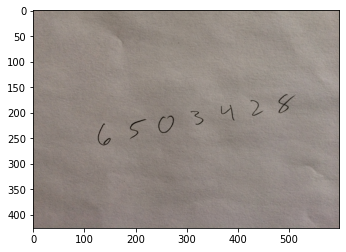

In [223]:
!wget www.unirioja.es/cu/joheras/ia/p10/imagen1.png
image = cv2.imread("imagen1.png")
mostrarImagen(image)

Convierte la imagen a escala de grises.

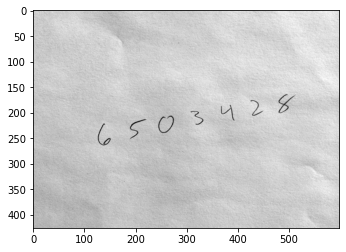

In [216]:
imageG = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
mostrarImagen(imageG)

Aplica una umbralización con valor de umbral 80.

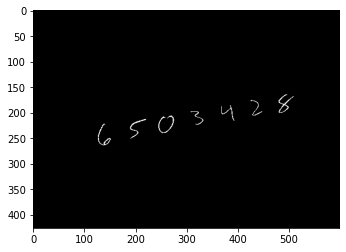

In [217]:
_, binarizadaINV = cv2.threshold(imageG, 80, 255, cv2.THRESH_BINARY_INV)
mostrarImagen(binarizadaINV)

Busca los cortornos de la imagen, y para cada uno de ellos encuentra el bounding box que lo contiene. 

In [211]:
contours, hier = cv2.findContours(binarizadaINV, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [231]:
idx = 0
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=image[y:y+h,x:x+w]
    cv2.imwrite(str(idx) + '.jpg', roi)
    #cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)

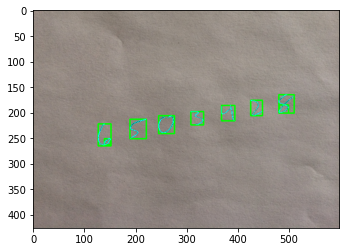

In [232]:
mostrarImagen(image)

Utilizando el bounding box que contiene al contorno, predice el número contenido utilizando el modelo que hayas definido y muestra el resultado en la imagen. Debes tener en cuenta varias cosas, las imágenes del dataset tienen tamaño 28x28, por lo que es posible que tengas que reescalar tu imagen, además en las imágenes el digito aparece en blanco con fondo negro, mientras que en la imagen está justo al revés, por lo que tendrás que invertir los colores. 

En este caso predeciremos el tercero que es el '5'

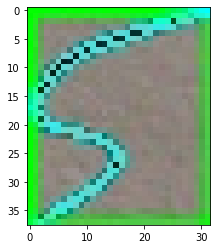

In [285]:
image = cv2.imread("3.jpg")
mostrarImagen(image)

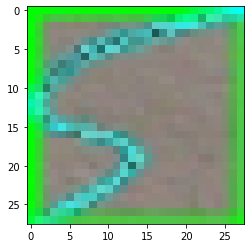

In [286]:
image2 = cv2.resize(image, (28,28))
mostrarImagen(image2)

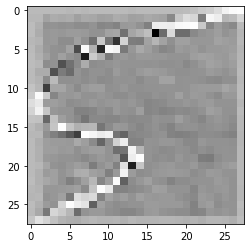

In [287]:
imageG2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
mostrarImagen(imageG2)

In [288]:
imageG2.shape

(28, 28)

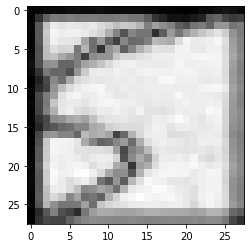

In [289]:
(l,a,b)= cv2.split(image2)
mostrarImagen(b)

In [290]:
b.shape

(28, 28)

In [291]:
b = b.reshape(1,784)

In [292]:
data = np.array(b)

In [293]:
modeloMejor.predict(data)

array(['5'], dtype='<U1')

Ha acertado, ha predicho el 5.

Guarda este fichero con tus soluciones a los distintos ejercicios usando la opción *"Save in Github..."*. 